In [11]:
## importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [3]:
##Loading data
dataframe = pd.read_csv('/content/sample_data/insurance.csv')

In [4]:
dataframe.shape

(1338, 7)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
##checking for null values
dataframe.isna().sum()

,0
age,0
sex,0
bmi,5
children,0
smoker,0
region,0
charges,0


In [8]:
dataframe['bmi'].fillna(dataframe['bmi'].mean())

,bmi
0,27.900
1,33.770
2,33.000
3,22.705
4,28.880
...,...
1333,30.970
1334,31.920
1335,36.850
1336,25.800


In [9]:
##checking for null values
dataframe.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


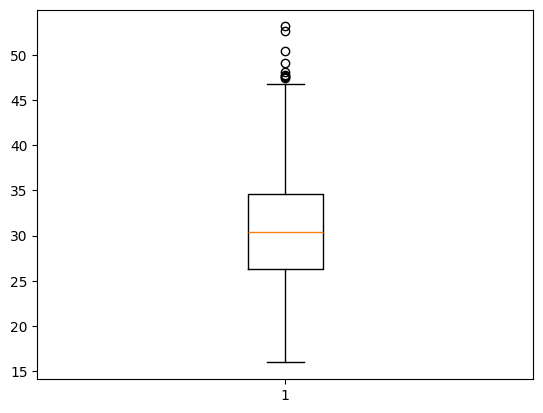

In [12]:
#boxplot of column bmi
plt.boxplot(dataframe['bmi'])
plt.show()

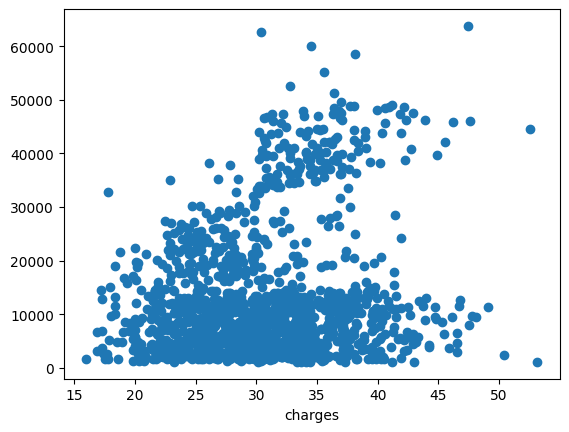

In [15]:
##Scattering for bmi Vs charges
plt.scatter(dataframe['bmi'],dataframe['charges'])
plt.xlabel('bmi')
plt.xlabel('charges')
plt.show()

In [17]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
# One-hot encode categorical features
x_encoded = pd.get_dummies(x, drop_first=True)

#Asssigning Dependent and Independent variables
x=dataframe[['age','bmi','children','smoker']]
y=dataframe['charges']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)
x_train

,age,bmi,children,smoker_yes
560,46,19.950,2,False
1285,47,24.320,0,False
1142,52,24.860,0,False
969,39,34.320,5,False
486,54,21.470,3,False
...,...,...,...,...
1095,18,31.350,4,False
1130,39,23.870,5,False
1294,58,25.175,0,False
860,37,47.600,2,True


In [31]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [32]:

# Fit and predict
from sklearn.linear_model import LinearRegression
model = LinearRegression()
y_pred = model.fit(x_train, y_train).predict(x_test)

y_pred

array([ 8589.41086315,  6976.72540676, 36848.28732104,  9452.30000828,
       26869.73143831, 11007.8762471 ,   195.42815784, 16712.90440231,
         840.77624573, 11167.81946942, 28564.00819906,  9292.72058429,
        5458.94254353, 38431.63274307, 40311.22952777, 37174.66979255,
       15223.77823826, 36012.29799119,  9344.54654046, 31439.39862097,
        4298.43054673, 10451.34023077,  2719.7555533 ,  6503.39866373,
       11242.90409953, 12464.49604728, 14784.63882977,  6048.80913618,
        9560.74686647,  2378.95224999,  9467.853048  , 12963.47218531,
        4665.92693001,  3476.01338334,  4817.50277951, 12427.41962095,
        2377.15740948,  9164.1126673 , 33298.34138698, 32721.26611581,
        4257.70578019,  4219.4312879 , 14401.3159194 , 11440.89437624,
        8884.12933129, 12516.82757306,  5114.63267128,  3580.80470245,
       35616.42214644,  9214.17454072, 15941.50879121,  2555.28367366,
       12079.46140849,  1093.57818622, 13539.87851902, 12097.4330707 ,
      

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are defined
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(mae)
print(r2)

33969649.736219235
4199.637924332448
0.78119209471274
